In [16]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

mengimport library yang akan digunakan

In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

membuat transformasi yang mengubah ke bentuk tensor, dan normalisasi data dengan mean 0,5 dan standar deviasi 0,5

In [18]:
trainset = datasets.MNIST('./data/', train=True, transform=transform)
testset = datasets.MNIST('./data/', train=False, transform=transform)

membuat set datatrain dan set datatest dari data gambar yang disimpan dalam folder data

In [19]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=True)

membuat loadernya, dengan batch = 50 (sesuai soal)

In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


melihat shape data, terlihat: batch 50, 1 warna, 28 x 28 piksel untuk gambar
dan ada 50 label untuk setiap batch (1 label untuk 1 gambar)

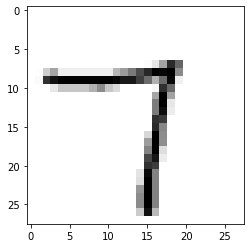

In [21]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

mencoba menampilkan salahsatu gambar, berukuran 28x28 piksel, dengan menggunakan library matplotlib

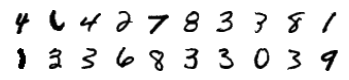

In [22]:
figure = plt.figure()
num_of_images = 20
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

menampilkan 20 gambar lainnya

In [23]:
input_size = 784
hidden_sizes = [100, 50]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


membuat model dengan input 784 (28x28), dengan melakukan flatten input image
membuat 2 hiden layer, hiden layer[0] ada 100 neuron, hiden layer[1] ada 50 neuron(sesuai soal),
setiap neuron menggunakan fungsi aktifasi relu
menentukan 10 output (0,1,2,3,4,5,6,7,8,9) dengan fungsi aktifasi logsoftmax

In [24]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

membuat loss fungsi

In [25]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        ...,
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        [ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040]])


melihat gradien (bobot neuron) sebelum proses backward dan setelah satu kali dilakukan backward
terlihan masing-masing terupdate dengan nilai baru, yang akan terus diupdate pada setiap iterasi berikutnya

In [27]:
optimizer = optim.Adam(model.parameters(), lr=0.001,)
time0 = time()
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.06809304057615616
Epoch 1 - Training loss: 0.06029350876667498
Epoch 2 - Training loss: 0.05587522070631773
Epoch 3 - Training loss: 0.050947111681938016
Epoch 4 - Training loss: 0.047386447822694515
Epoch 5 - Training loss: 0.04508332669482722
Epoch 6 - Training loss: 0.04266384580504867
Epoch 7 - Training loss: 0.041124225035188526
Epoch 8 - Training loss: 0.03815674116759813
Epoch 9 - Training loss: 0.035862249915347394
Epoch 10 - Training loss: 0.036321090013734646
Epoch 11 - Training loss: 0.03441195921498244
Epoch 12 - Training loss: 0.03155428149420307
Epoch 13 - Training loss: 0.030129152554642737
Epoch 14 - Training loss: 0.030789983500332407
Epoch 15 - Training loss: 0.02797598468726695
Epoch 16 - Training loss: 0.027449878568704664
Epoch 17 - Training loss: 0.02601520570744166
Epoch 18 - Training loss: 0.024945363863171224
Epoch 19 - Training loss: 0.023574770284133895

Training Time (in minutes) = 9.414805241425832


melakukan iterasi dengan 
Optimisasi menggunakan Adam, learning-rate 0,001 (sesuai soal) sebanyak 20 epochs

In [28]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

membuat fungsi untuk menampilkan hasil output, setelah diperoleh model dengan gambar uji yang diberikan

Predicted Digit = 2


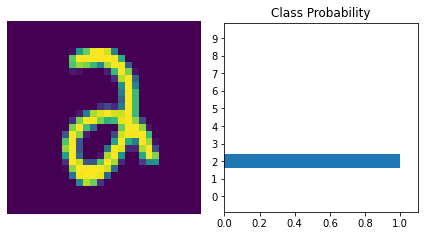

In [30]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

terlihat model berhasil mengenali gambar dengan benar

In [31]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9743


hasil uji model yang telah diperoleh , pada 10000 data test
Akurasinya adalah 97,43 %